In [7]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os
from IPython.display import display, HTML

#HTML(df.to_html())
#display(df)

hpi_red = '#b00639'
hpi_blue = '#007a9e'
hpi_yellow = '#ffde94'

def create_folder(filename):
    if not os.path.exists(os.path.dirname(filename)):
        try:
            os.makedirs(os.path.dirname(filename))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
                
def save_plot(filename):
    filename = filename.replace(" ", "_").replace(":", "_").replace(".", "_") \
                       .replace(",", "_").replace("\n", "_").replace("__", "_").lower()
    create_folder("plots/data_structure_query/")
    plt.savefig('plots/data_structure_query/{}.pgf'.format(filename))
    plt.savefig('plots/data_structure_query/{}.pdf'.format(filename))

def get_column_names(cached): 
    file_name = 'results/data_structure_query_' + cached + '_results.csv.json'
    table_info = json.load(open(file_name,'r'))
    column_names = []
    for column in table_info["columns"]:
        column_names.append(column["name"])
    return column_names

def get_results(cached):
    file_name = 'results/data_structure_query_' + cached + '_results.csv'
    return pd.read_csv(file_name, header=None, names=get_column_names(cached))

# Columns: data_type, data_structure, sample_size, value_count, run_time
def select(data, data_type, data_structure):
    return data[(data.data_type == data_type) & (data.data_structure == data_structure)]

def barplot(data_type):
    #Prepare data
    results_cached = get_results("cached")
    sample_size_cached = results_cached["sample_size"].iloc[0]
    filter_result_cached = select(results_cached, data_type, "filter")["run_time"].iloc[0]
    dictionary_result_cached = select(results_cached, data_type, "dictionary")["run_time"].iloc[0]
    filter_result_cached = sample_size_cached / (filter_result_cached / pow(10, 6))
    dictionary_result_cached = sample_size_cached / (dictionary_result_cached / pow(10, 6))
    
    results_uncached = get_results("uncached")
    sample_size_uncached = results_uncached["sample_size"].iloc[0]
    filter_result_uncached = select(results_uncached, data_type, "filter")["run_time"].iloc[0]
    dictionary_result_uncached = select(results_uncached, data_type, "dictionary")["run_time"].iloc[0]
    filter_result_uncached = sample_size_uncached / (filter_result_uncached / pow(10, 6))
    dictionary_result_uncached = sample_size_uncached / (dictionary_result_uncached / pow(10, 6))
    data_cached = [dictionary_result_cached / pow(10, 6) , filter_result_cached / pow(10, 6)]
    data_uncached = [dictionary_result_uncached / pow(10, 6) , filter_result_uncached / pow(10, 6)]
    max_cached = max(data_cached)
    max_uncached = max(data_uncached)
    max_performance = max(max_cached, max_uncached)

    
    # Configure figure
    #plt.rc('xtick', labelsize=8)
    plt.rc('axes', titlesize=10)
    plt.rc('figure', titlesize=13)
    plt.rc('figure', figsize=(8, 4))
    
    # Plot data
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    title = "Million Lookups per Second: " + data_type.title()
    plt.ylabel('Performance [mio. ops/s]')
    f.suptitle(title, y=1.03)
    labels=["Dictionary", "Filter"]
    
   
    bar1 = ax1.bar(range(2), data_cached, width=1/1.5, tick_label=labels, color=[hpi_red, hpi_yellow], linewidth=1.0, edgecolor=['black', 'black'])
    ax1.set_title("Cached")
    ax1.yaxis.grid()
    plt.ylim(0, max_performance * 1.2)
    ax1.set_axisbelow(True)
    
    
    bar2 = ax2.bar(range(2), data_uncached, width=1/1.5, tick_label=labels, color=[hpi_red, hpi_yellow], linewidth=1.0, edgecolor=['black', 'black'])
    ax2.set_title("Uncached")
    ax2.yaxis.grid()
    plt.ylim(0, max_performance * 1.2)
    ax2.set_axisbelow(True)
    
    
    # Add labels
    def autolabel(ax, rects):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            label_x = rect.get_x() + rect.get_width()/2.
            label_y = height + 0.03 * max_performance
            #label_text = '%d' % int(height)
            label_text = '{:0.3f}'.format(height)
            ax.text(label_x, label_y, label_text, ha='center', va='bottom')

    autolabel(ax1, bar1)
    autolabel(ax2, bar2)
    
    # Save output and render
    save_plot(title)
    plt.show()

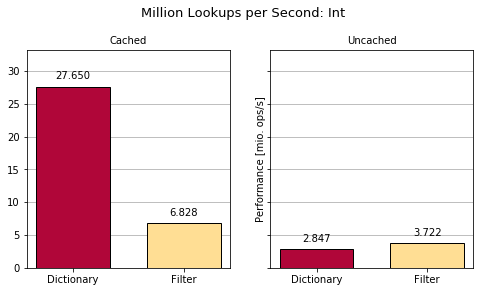

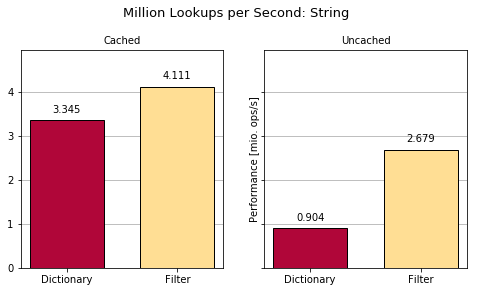

In [8]:
barplot("int")
barplot("string")